# Model training

In thi section we will train the model using different strategies and with different attributes to see which one gives the best results. 

In [1]:
import pandas as pd

data_file_path = "./datasets/generated/cleaned_aggregated_data.json"

df = pd.read_json(data_file_path)

df.head()

,tmID,year,playoff,averageWinRate,averagePoints,averageRebounds,averageAssists,averageSteals,averageBlocks,averageTurnovers,averageFGRatio,averageFTRatio,averageThreeRatio,coachWinRate,numberOfAwardedPlayers
0,WAS,10,Y,0.294118,189.512143,84.572143,42.982857,19.696786,7.073929,44.290357,0.408655,0.717564,0.306577,0.500000,0
1,WAS,9,N,0.470588,189.708943,82.593336,36.207412,20.147909,8.820809,38.090105,0.402735,0.800336,0.276818,0.500000,2
2,WAS,8,N,0.529412,239.624444,95.275556,50.680741,25.660000,10.042222,44.559259,0.434105,0.760861,0.303131,0.529412,2
3,WAS,7,Y,0.470588,216.456929,88.321161,42.381086,23.959738,8.204120,39.441011,0.422553,0.743379,0.337256,0.470588,2
4,WAS,6,N,0.500000,193.306310,92.482727,39.100875,21.625518,11.273146,39.394288,0.429846,0.706172,0.334885,0.437500,1


## Decision Tree Classifier

In [2]:
#load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [3]:
# Get the needed features (attributes)
features = list(df.columns)
features.remove('playoff')
features.remove('tmID')
target = 'playoff'
X = df[features]
y = df[target]

### Random split of dataset

In [4]:
# Split dataset into training set and test set - random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

We normalize the feature values so we have more training stability

In [5]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

Create model objects

In [6]:
models = {}

#Logistic Regression
models['Logistic Regression'] = LogisticRegression()

#Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

#Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

#Random Forest
models['Random Forest'] = RandomForestClassifier()

#Naive Bayes
models['Naive Bayes'] = GaussianNB()

#K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

Train, predict and calculate scores

In [7]:
accuracy, precision, recall = {}, {}, {}

for model in models.keys():
    # Fit the classifier
    models[model].fit(X_train, y_train)
    
    # Make predictions
    y_pred = models[model].predict(X_test)
    
    # Calculate metrics
    accuracy[model] = metrics.accuracy_score(y_test, y_pred)
    precision[model] = metrics.precision_score(y_test, y_pred, pos_label='Y')
    recall[model] = metrics.recall_score(y_test, y_pred, pos_label='Y')

z:\Programs\Python3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Results for random split

In [8]:
df_results = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_results['Accuracy'] = accuracy.values()
df_results['Precision'] = precision.values()
df_results['Recall'] = recall.values()

df_results

,Accuracy,Precision,Recall
Logistic Regression,0.578947,0.571429,0.631579
Support Vector Machines,0.605263,0.600000,0.631579
Decision Trees,0.657895,0.650000,0.684211
Random Forest,0.578947,0.555556,0.789474
Naive Bayes,0.657895,0.650000,0.684211
K-Nearest Neighbor,0.631579,0.631579,0.631579


### Split dataset by years (train on oldest)

Split dataset such as: Train data - first 7 years, Test data - last 3 years

In [63]:

#Split dataset in such way that we use latest years for training and older years for testing
X_train=df[df["year"]<8][features]
X_test=df[df["year"]>=8][features]
y_train=df[df["year"]<8]["playoff"]
y_test=df[df["year"]>=8]["playoff"]

# Get percentage of data in each dataset
print("X_train: ", round((len(X_train) / (len(X_train) + len(X_test))) * 100, 2), "%")
print("X_test: ", round((len(X_test) / (len(X_train) + len(X_test))) * 100, 2), "%")
print("y_train: ", round((len(y_train) / (len(y_train) + len(y_test))) * 100, 2), "%")
print("y_test: ", round((len(y_test) / (len(y_train) + len(y_test))) * 100, 2), "%")


X_train:  68.25 %
X_test:  31.75 %
y_train:  68.25 %
y_test:  31.75 %


We normalize the feature values so we have more training stability

In [21]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.

Create model objects

In [65]:
models = {}

#Logistic Regression
models['Logistic Regression'] = LogisticRegression()

#Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

#Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

#Random Forest
models['Random Forest'] = RandomForestClassifier()

#Naive Bayes
models['Naive Bayes'] = GaussianNB()

#K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

Train, predict and calculate scores

In [66]:
accuracy, precision, recall = {}, {}, {}

for model in models.keys():
    
    # Fit the classifier
    models[model].fit(X_train, y_train)
    
    # Make predictions
    y_pred = models[model].predict(X_test)
    
    # Calculate metrics
    accuracy[model] = metrics.accuracy_score(y_test, y_pred)
    precision[model] = metrics.precision_score(y_test, y_pred, pos_label='Y')
    recall[model] = metrics.recall_score(y_test, y_pred, pos_label='Y')

z:\Programs\Python3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Results for spliting by years by oldest.

In [67]:
df_results = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_results['Accuracy'] = accuracy.values()
df_results['Precision'] = precision.values()
df_results['Recall'] = recall.values()

df_results

,Accuracy,Precision,Recall
Logistic Regression,0.550,0.615385,0.666667
Support Vector Machines,0.600,0.653846,0.708333
Decision Trees,0.525,0.608696,0.583333
Random Forest,0.625,0.714286,0.625000
Naive Bayes,0.575,0.666667,0.583333
K-Nearest Neighbor,0.600,0.750000,0.500000


### Split dataset by years (train on latest)

Split dataset such as: Train data - last 7 years, Test data - first 3 years

In [68]:
#Split dataset in such way that we use latest years for training and older years for testing
X_train=df[df["year"]>3][features]
X_test=df[df["year"]<=3][features]
y_train=df[df["year"]>3]["playoff"]
y_test=df[df["year"]<=3]["playoff"]

# Get percentage of data in each dataset
print("X_train: ", round((len(X_train) / (len(X_train) + len(X_test))) * 100, 2), "%")
print("X_test: ", round((len(X_test) / (len(X_train) + len(X_test))) * 100, 2), "%")
print("y_train: ", round((len(y_train) / (len(y_train) + len(y_test))) * 100, 2), "%")
print("y_test: ", round((len(y_test) / (len(y_train) + len(y_test))) * 100, 2), "%")


X_train:  74.6 %
X_test:  25.4 %
y_train:  74.6 %
y_test:  25.4 %


We normalize the feature values so we have more training stability

In [69]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

Create model objects

In [70]:
models = {}

#Logistic Regression
models['Logistic Regression'] = LogisticRegression()

#Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

#Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

#Random Forest
models['Random Forest'] = RandomForestClassifier()

#Naive Bayes
models['Naive Bayes'] = GaussianNB()

#K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

Train, predict and calculate scores

In [71]:
accuracy, precision, recall = {}, {}, {}

for model in models.keys():
    
    # Fit the classifier
    models[model].fit(X_train, y_train)
    
    # Make predictions
    y_pred = models[model].predict(X_test)
    
    # Calculate metrics
    accuracy[model] = metrics.accuracy_score(y_test, y_pred)
    precision[model] = metrics.precision_score(y_test, y_pred, pos_label='Y')
    recall[model] = metrics.recall_score(y_test, y_pred, pos_label='Y')

z:\Programs\Python3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Results for split by year by latest.

In [72]:
df_results = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_results['Accuracy'] = accuracy.values()
df_results['Precision'] = precision.values()
df_results['Recall'] = recall.values()

df_results

,Accuracy,Precision,Recall
Logistic Regression,0.53125,0.521739,0.7500
Support Vector Machines,0.56250,0.545455,0.7500
Decision Trees,0.56250,0.545455,0.7500
Random Forest,0.50000,0.500000,0.6875
Naive Bayes,0.62500,0.611111,0.6875
K-Nearest Neighbor,0.62500,0.611111,0.6875


## Conclusion

From the tested methods for training the model we can summarize the best models as follows:

| Split | Method | Accuracy | Precision | Recall |
| ----- | ------ | -------- | --------- | ------ |
| Random split (70% train, 30% test) | Naive Bayes | 0.657895 | 0.650000 | 0.684211 |
| Split by year - train on oldest 7 | K-Nearest Neighbor | 0.600 | 0.750000 | 0.500000 |
| Split by year - train on latest 7 | Naive Bayes, K-Nearest Neighbor | 0.62500 | 0.611111 | 0.6875 |

## For research purposes train all models on all year splits 

In [9]:
models = {}

#Logistic Regression
models['Logistic Regression'] = LogisticRegression()

#Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

#Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

#Random Forest
models['Random Forest'] = RandomForestClassifier()

#Naive Bayes
models['Naive Bayes'] = GaussianNB()

#K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [49]:
#dictionary for storing all results
all_results = {}

for i in range(2,10): 
#Split dataset in such way that we use latest years for training and older years for testing
    X_train=df[df["year"]<=i][features]
    X_test=df[df["year"]>i][features]
    y_train=df[df["year"]<=i]["playoff"]
    y_test=df[df["year"]>i]["playoff"]

    accuracy, precision, recall = {}, {}, {}

    for model in models.keys():
        
        # Fit the classifier
        models[model].fit(X_train, y_train)
        
        # Make predictions
        y_pred = models[model].predict(X_test)
        
        # Calculate metrics
        accuracy[model] = metrics.accuracy_score(y_test, y_pred)
        precision[model] = metrics.precision_score(y_test, y_pred, pos_label='Y')
        recall[model] = metrics.recall_score(y_test, y_pred, pos_label='Y')
    
    all_results[f'Split_Year_{i}'] = {
        'Accuracy': accuracy.copy(),
        'Precision': precision.copy(),
        'Recall': recall.copy()
    }
        
# Create a multi-index DataFrame for all results
index = pd.MultiIndex.from_product([all_results.keys(), models.keys()], names=['Split', 'Model'])
df_results = pd.DataFrame(index=index, columns=['Accuracy', 'Precision', 'Recall'])

# Populate the DataFrame with results
for split, results_dict in all_results.items():
    for metric, model_dict in results_dict.items():
        for model, value in model_dict.items():
            df_results.loc[(split, model), metric] = value

# Display the final DataFrame
print(df_results)

z:\Programs\Python3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
z:\Programs\Python3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
z:\Programs\Python3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
z:\Programs\Python3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarnin

                                      Accuracy Precision    Recall
Split        Model                                                
Split_Year_2 Logistic Regression      0.636364     0.625    0.9375
             Support Vector Machines  0.627273  0.629213     0.875
             Decision Trees           0.590909  0.693878   0.53125
             Random Forest            0.618182  0.689655     0.625
             Naive Bayes              0.627273   0.64557  0.796875
             K-Nearest Neighbor       0.481818  0.561404       0.5
Split_Year_3 Logistic Regression      0.617021  0.884615  0.410714
             Support Vector Machines   0.62766  0.684211  0.696429
             Decision Trees           0.574468  0.681818  0.535714
             Random Forest            0.648936  0.716981  0.678571
             Naive Bayes              0.734043  0.762712  0.803571
             K-Nearest Neighbor            0.5  0.604651  0.464286
Split_Year_4 Logistic Regression         0.675  0.823529  0.58

In [37]:
df_results

Accuracy Precision    Recall
Split        Model                                                
Split_Year_2 Logistic Regression      0.636364     0.625    0.9375
             Support Vector Machines  0.618182  0.612245    0.9375
             Decision Trees           0.609091  0.623529  0.828125
             Random Forest            0.636364       0.7   0.65625
             Naive Bayes              0.627273   0.64557  0.796875
             K-Nearest Neighbor       0.481818  0.561404       0.5
Split_Year_3 Logistic Regression      0.617021  0.884615  0.410714
             Support Vector Machines  0.595745  0.595745       1.0
             Decision Trees           0.595745  0.655172  0.678571
             Random Forest            0.617021  0.685185  0.660714
             Naive Bayes              0.734043  0.762712  0.803571
             K-Nearest Neighbor            0.5  0.604651  0.464286
Split_Year_4 Logistic Regression         0.675  0.823529  0.583333
             Support Vector Machines    0.6125  0.607595       1.0
             Decision Trees               0.55     0.625     0.625
             Random Forest               0.625  0.660714  0.770833
             Naive Bayes                0.7625  0.737705    0.9375
             K-Nearest Neighbor         0.6125  0.697674     0.625
Split_Year_5 Logistic Regression       0.61194  0.888889       0.4
             Support Vector Machines  0.597015  0.658537     0.675
             Decision Trees           0.507463  0.585366       0.6
             Random Forest             0.61194  0.659091     0.725
             Naive Bayes              0.746269  0.755556      0.85
             K-Nearest Neighbor       0.641791  0.710526     0.675
Split_Year_6 Logistic Regression      0.592593  0.777778    0.4375
             Support Vector Machines   0.62963  0.615385       1.0
             Decision Trees           0.444444  0.529412    0.5625
             Random Forest             0.62963  0.666667      0.75
             Naive Bayes              0.759259   0.74359   0.90625
             K-Nearest Neighbor       0.611111  0.666667    0.6875
Split_Year_7 Logistic Regression           0.6  0.633333  0.791667
             Support Vector Machines       0.6  0.722222  0.541667
             Decision Trees              0.625  0.695652  0.666667
             Random Forest                 0.6  0.617647     0.875
             Naive Bayes                   0.7  0.676471  0.958333
             K-Nearest Neighbor            0.6  0.642857      0.75
Split_Year_8 Logistic Regression      0.592593  0.647059    0.6875
             Support Vector Machines  0.407407       0.0       0.0
             Decision Trees            0.62963  0.666667      0.75
             Random Forest             0.62963  0.636364     0.875
             Naive Bayes              0.666667  0.652174    0.9375
             K-Nearest Neighbor       0.592593  0.631579      0.75
Split_Year_9 Logistic Regression      0.615385  0.636364     0.875
             Support Vector Machines  0.615385  0.636364     0.875
             Decision Trees           0.538462       0.6      0.75
             Random Forest            0.615385  0.636364     0.875
             Naive Bayes              0.538462  0.583333     0.875
             K-Nearest Neighbor       0.538462  0.583333     0.875

Graph out all models

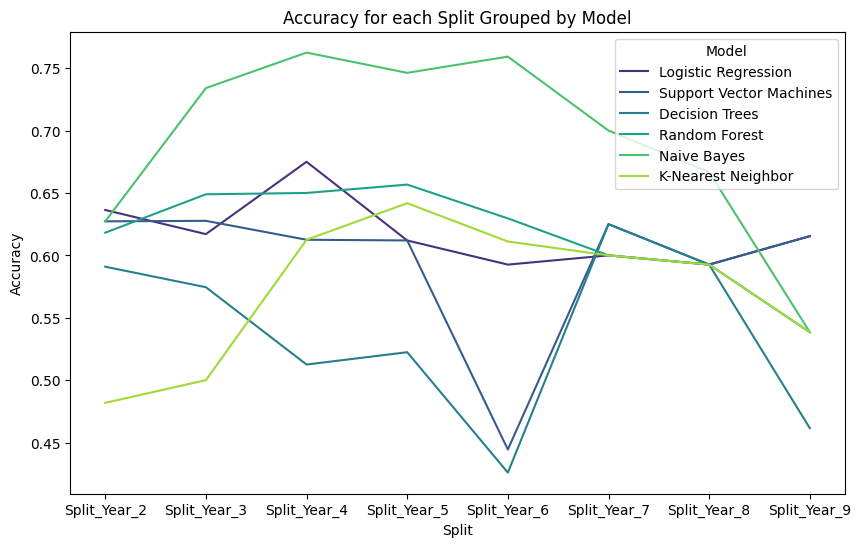

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_temp = df_results
df_temp.reset_index(inplace=True)

df_temp.head()

df_temp['Split'] = pd.Categorical(df_temp['Split'])

plt.figure(figsize=(10, 6))
sns.lineplot(x="Split", y="Accuracy", hue='Model', data=df_temp, palette='viridis')

plt.title('Accuracy for each Split Grouped by Model')
plt.xlabel('Split')
plt.ylabel('Accuracy')
plt.show()